In [1]:
import numpy as np
from PIL import Image

## Resize

Using Pillow, we can resize an image to a given (height, width).

In [4]:
impath = '../images/segment-12212767626682531382_2100_150_2120_150_with_camera_labels_48.png'

In [7]:
img = Image.open(impath)
print(f'The image size is {img.size}')

The image size is (1920, 1280)


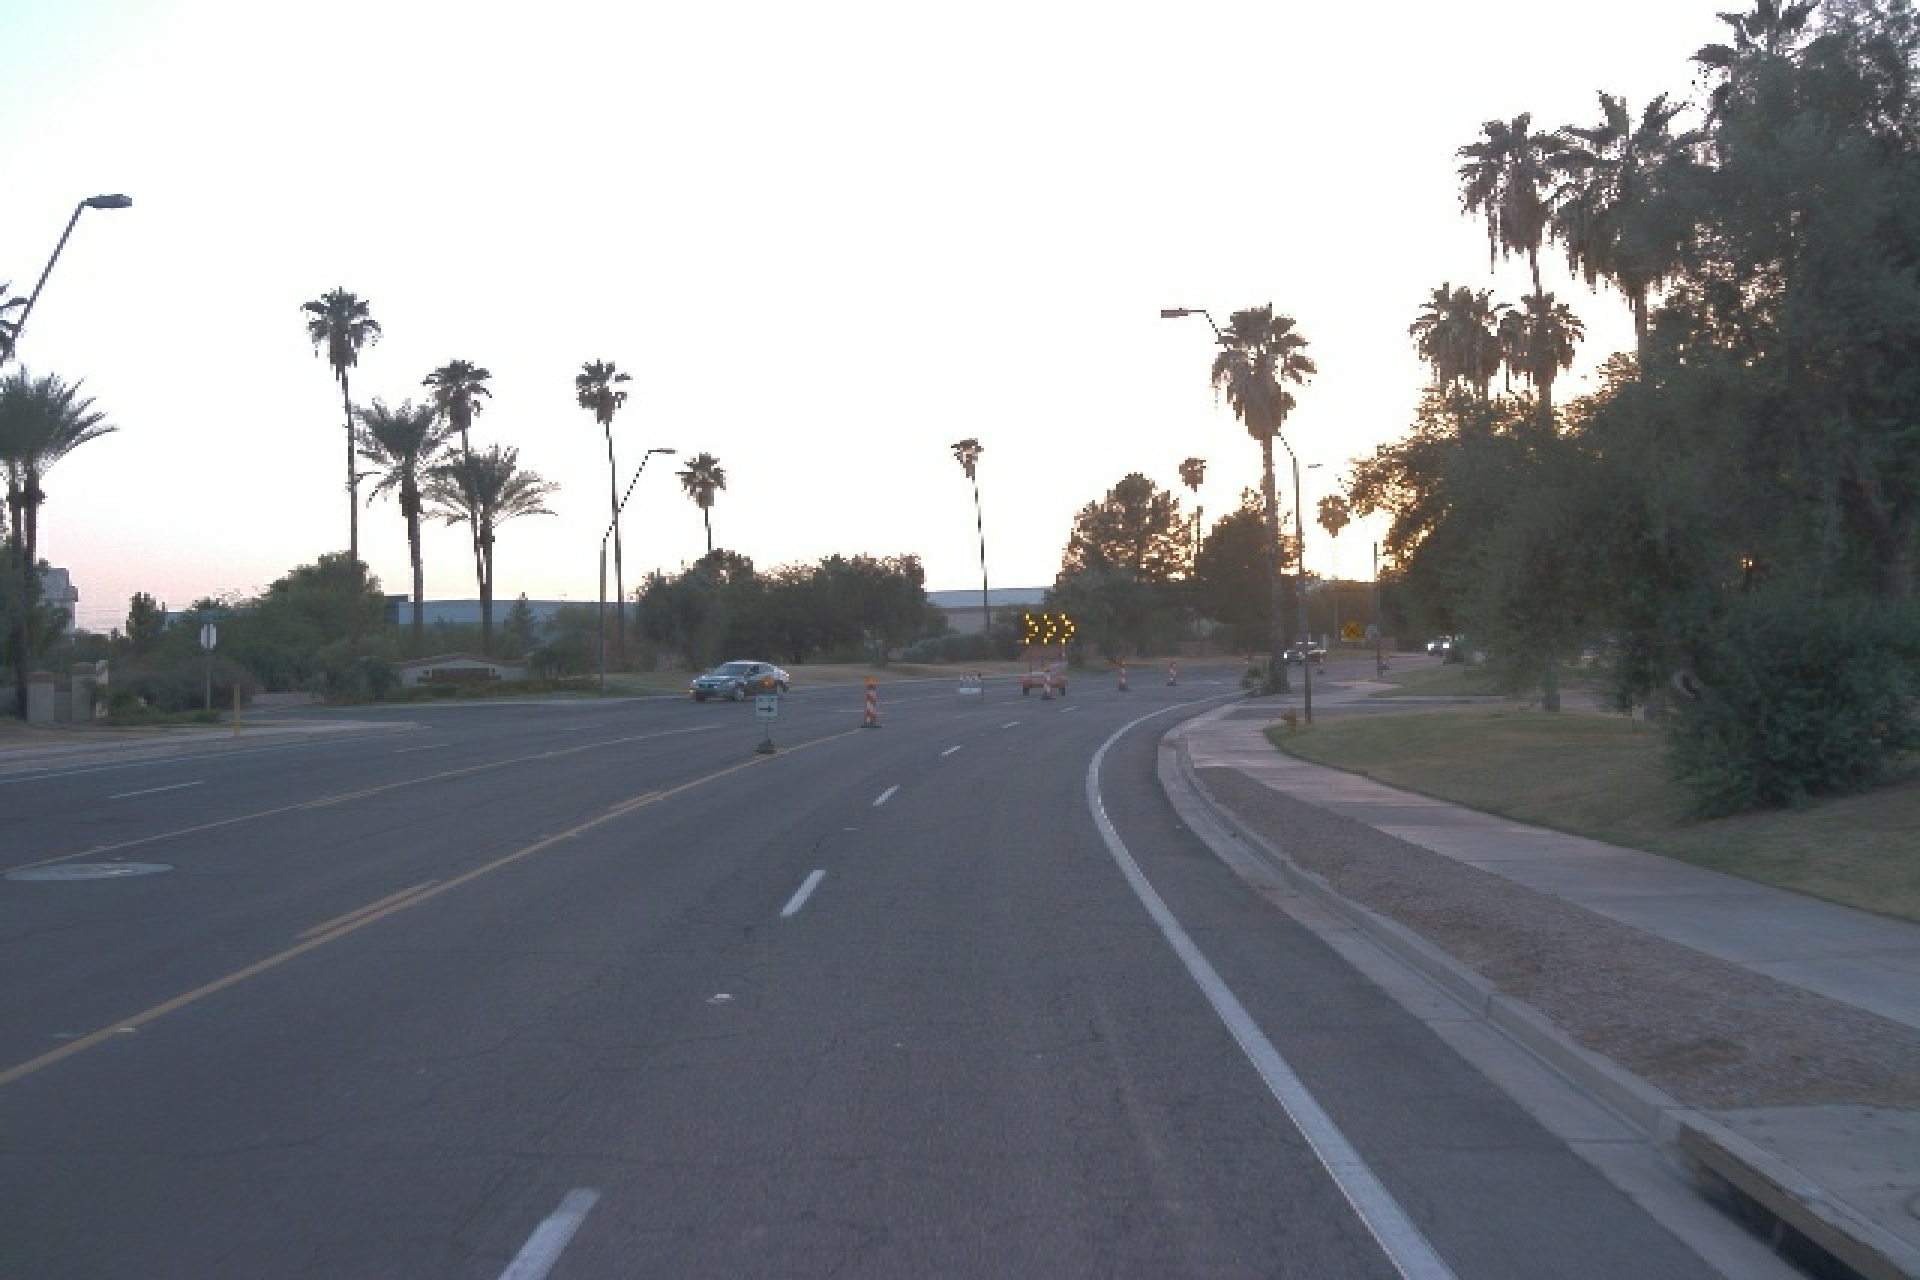

In [45]:
img

In [9]:
img_resized = img.resize((960, 640))
print(f'The image size is {img_resized.size}')

The image size is (960, 640)


In [11]:
1920*1280, 960*640

(2457600, 614400)

In [15]:
np.array(img)

array([[[224, 255, 250],
        [224, 255, 250],
        [224, 255, 250],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[224, 255, 250],
        [224, 255, 250],
        [224, 255, 250],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[224, 255, 250],
        [224, 255, 250],
        [224, 255, 250],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       ...,

       [[ 62,  69,  79],
        [ 62,  69,  79],
        [ 62,  69,  79],
        ...,
        [ 77,  87,  97],
        [ 77,  87,  97],
        [ 77,  87,  97]],

       [[ 63,  70,  80],
        [ 63,  70,  80],
        [ 63,  70,  80],
        ...,
        [ 70,  80,  90],
        [ 70,  80,  90],
        [ 70,  80,  90]],

       [[ 63,  70,  80],
        [ 63,  70,  80],
        [ 63,  70,  80],
        ...,
        [ 70,  80,  90],
        [ 70,  80,  90],
        [ 70,  80,  90]]

In [16]:
np.array(img_resized)

array([[[224, 255, 250],
        [224, 255, 250],
        [224, 255, 250],
        ...,
        [254, 255, 255],
        [255, 254, 255],
        [255, 254, 255]],

       [[224, 255, 250],
        [224, 255, 250],
        [224, 255, 250],
        ...,
        [250, 253, 253],
        [254, 255, 255],
        [255, 254, 255]],

       [[224, 255, 250],
        [224, 255, 250],
        [224, 255, 250],
        ...,
        [250, 254, 254],
        [253, 255, 255],
        [253, 254, 255]],

       ...,

       [[ 60,  69,  78],
        [ 59,  68,  77],
        [ 59,  68,  77],
        ...,
        [ 83,  93, 103],
        [ 85,  95, 106],
        [ 86,  96, 108]],

       [[ 62,  69,  79],
        [ 62,  69,  79],
        [ 62,  69,  79],
        ...,
        [ 70,  80,  90],
        [ 73,  83,  93],
        [ 77,  87,  97]],

       [[ 63,  70,  80],
        [ 63,  70,  80],
        [ 63,  70,  80],
        ...,
        [ 67,  75,  86],
        [ 69,  78,  89],
        [ 70,  80,  90]]

## Affine transformation

An affine transformation is a **geometric transformation that preserves lines and parallelism** (but not necessarily distances and angles)



### Resizing

Resizing is a specific type of affine transformation. We can replicate the result by using the following transformation matrix:

$$
\left(\begin{array}{ccc} 
c_{x} & 0 & 0\\
0 & c_{y} & 0\\
0 & 0 & 1\\
\end{array}\right)
$$ 

In Pillow, we can use $c_{x} = 0.5$ and $c_{y} = 0.5$ to divide each dimension of the image by 2.


In [12]:
trans_matrix = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 1]])
trans_inv = np.linalg.inv(trans_matrix)
trans_inv

array([[2., 0., 0.],
       [0., 2., 0.],
       [0., 0., 1.]])

In [13]:
im_trans = img.transform((960, 640), method=Image.AFFINE, data=trans_inv.flatten())
print(f'The image size is {im_trans.size}')

The image size is (960, 640)


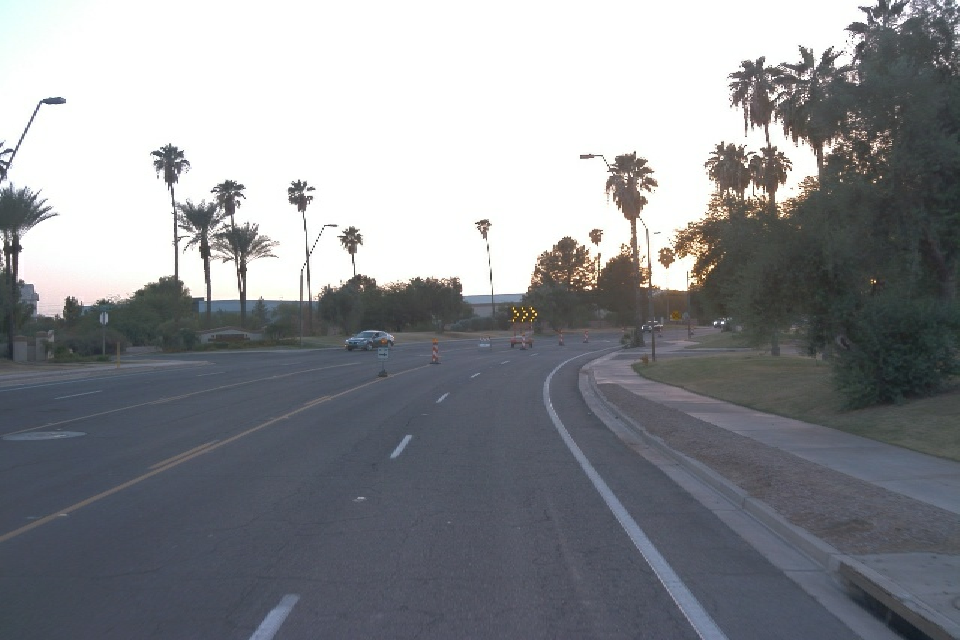

In [14]:
im_trans

### Translation

We can use the same function to perform rotation

$$
\left(\begin{array}{ccc} 
1 & 0 & t_{x}\\
0 & 1 & t_{y}\\
0 & 0 & 1\\
\end{array}\right)
$$ 

For example, we are going to translate the image by 200 pixels right and 100 pixels down respectively. We will use $t_{x}=200$ and  $t_{y}=100$

In [17]:
trans_matrix = np.array([[1, 0, 200], [0, 1, 100], [0, 0, 1]])
trans_inv = np.linalg.inv(trans_matrix)

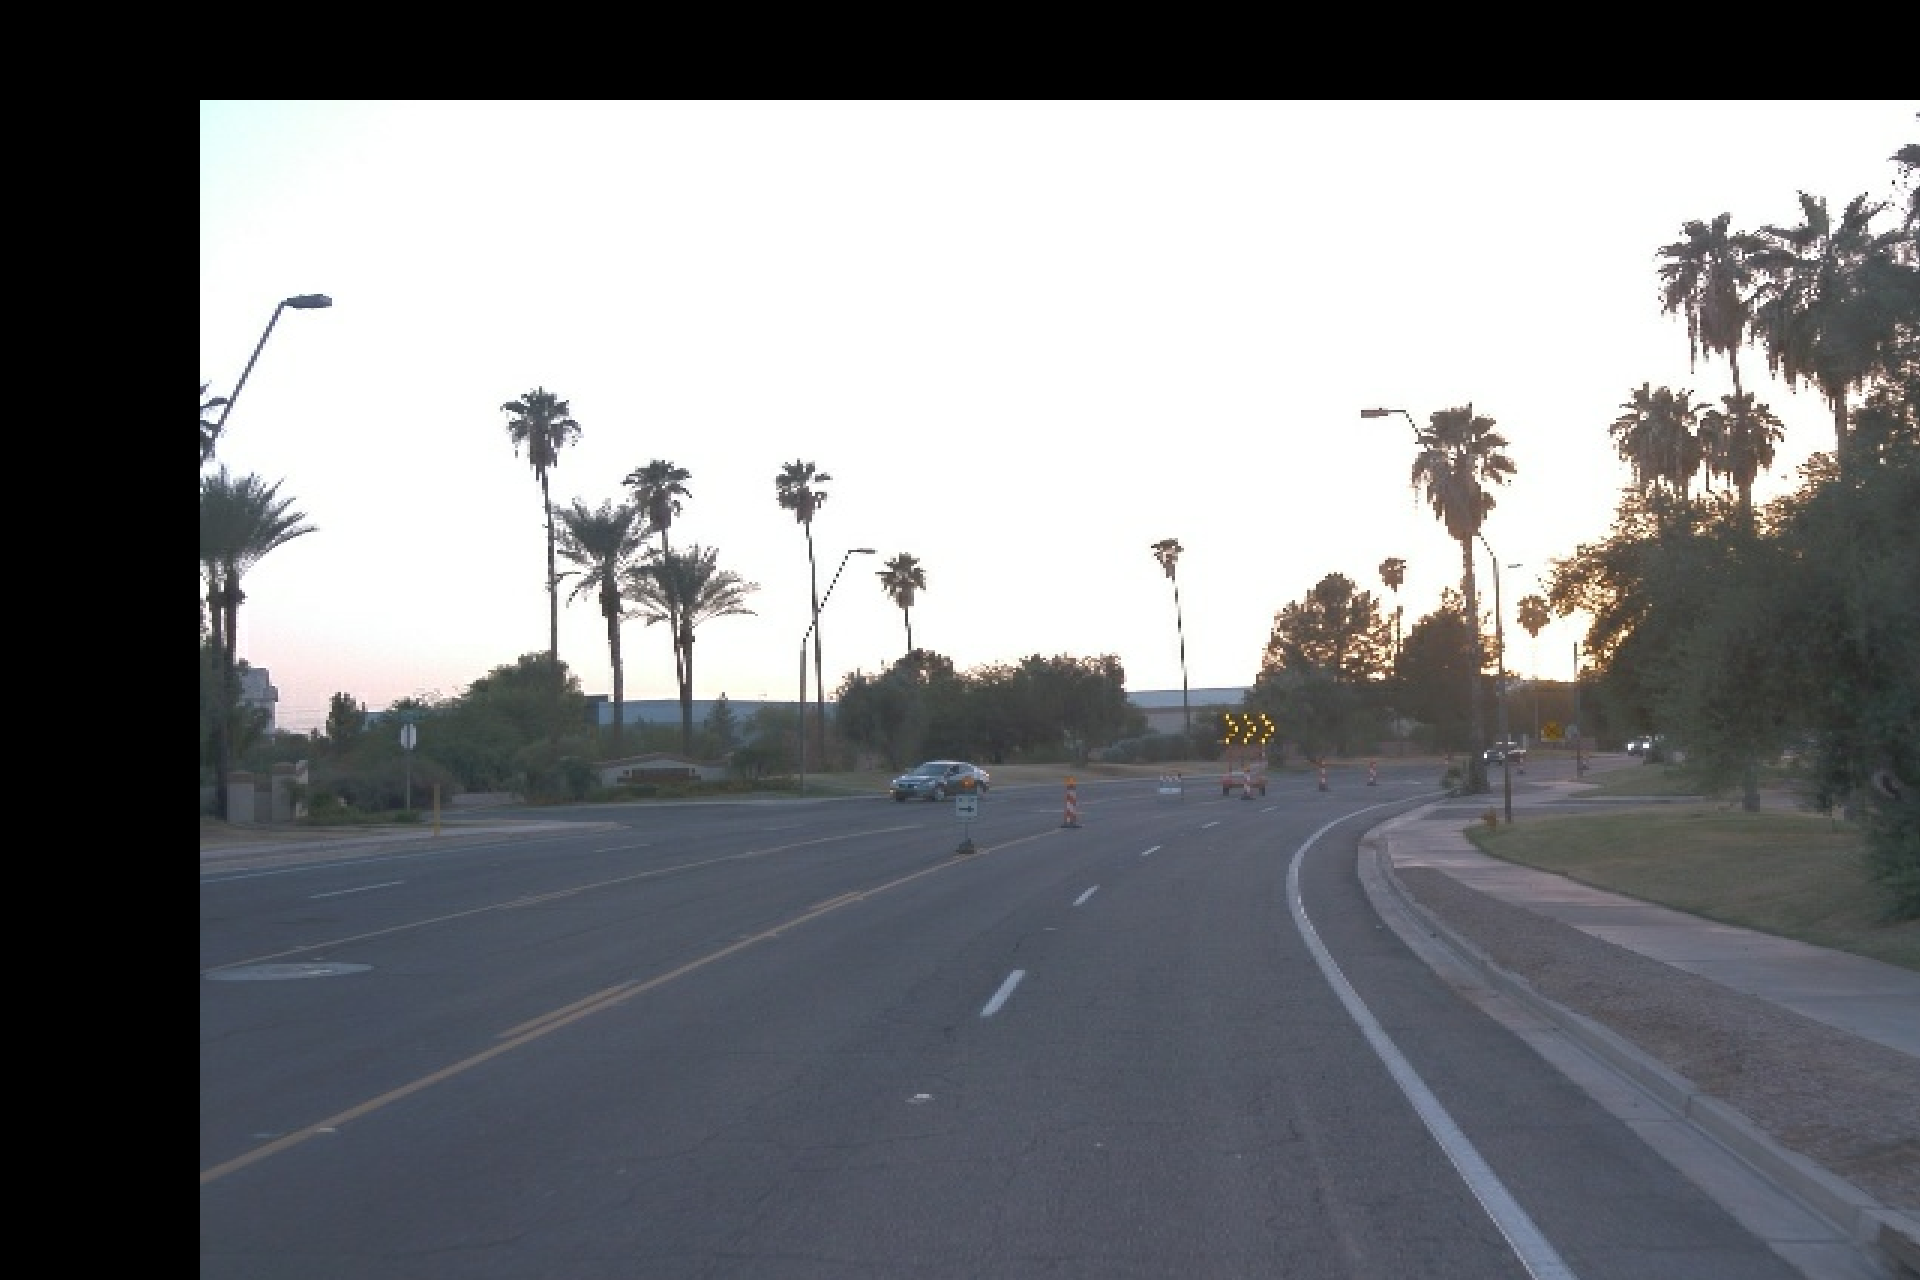

In [18]:
img.transform(img.size, method=Image.AFFINE, data=trans_inv.flatten())

### Shear

We can use the same function to perform horizontal or vertical shearing:

$$
\left(\begin{array}{ccc} 
1 & s_{x} & 0\\
s_{y} & 1 & 0\\
0 & 0 & 1\\
\end{array}\right)
$$ 

In [31]:
# trans_matrix = np.array([[1, 0.1, 0], [0, 1, 0], [0, 0, 1]])
# trans_matrix = np.array([[1, 0, 0], [0.2, 1, 0], [0, 0, 1]])
trans_matrix = np.array([[1, 0.2, 0], [0.2, 1, 0], [0, 0, 1]])
trans_inv = np.linalg.inv(trans_matrix)

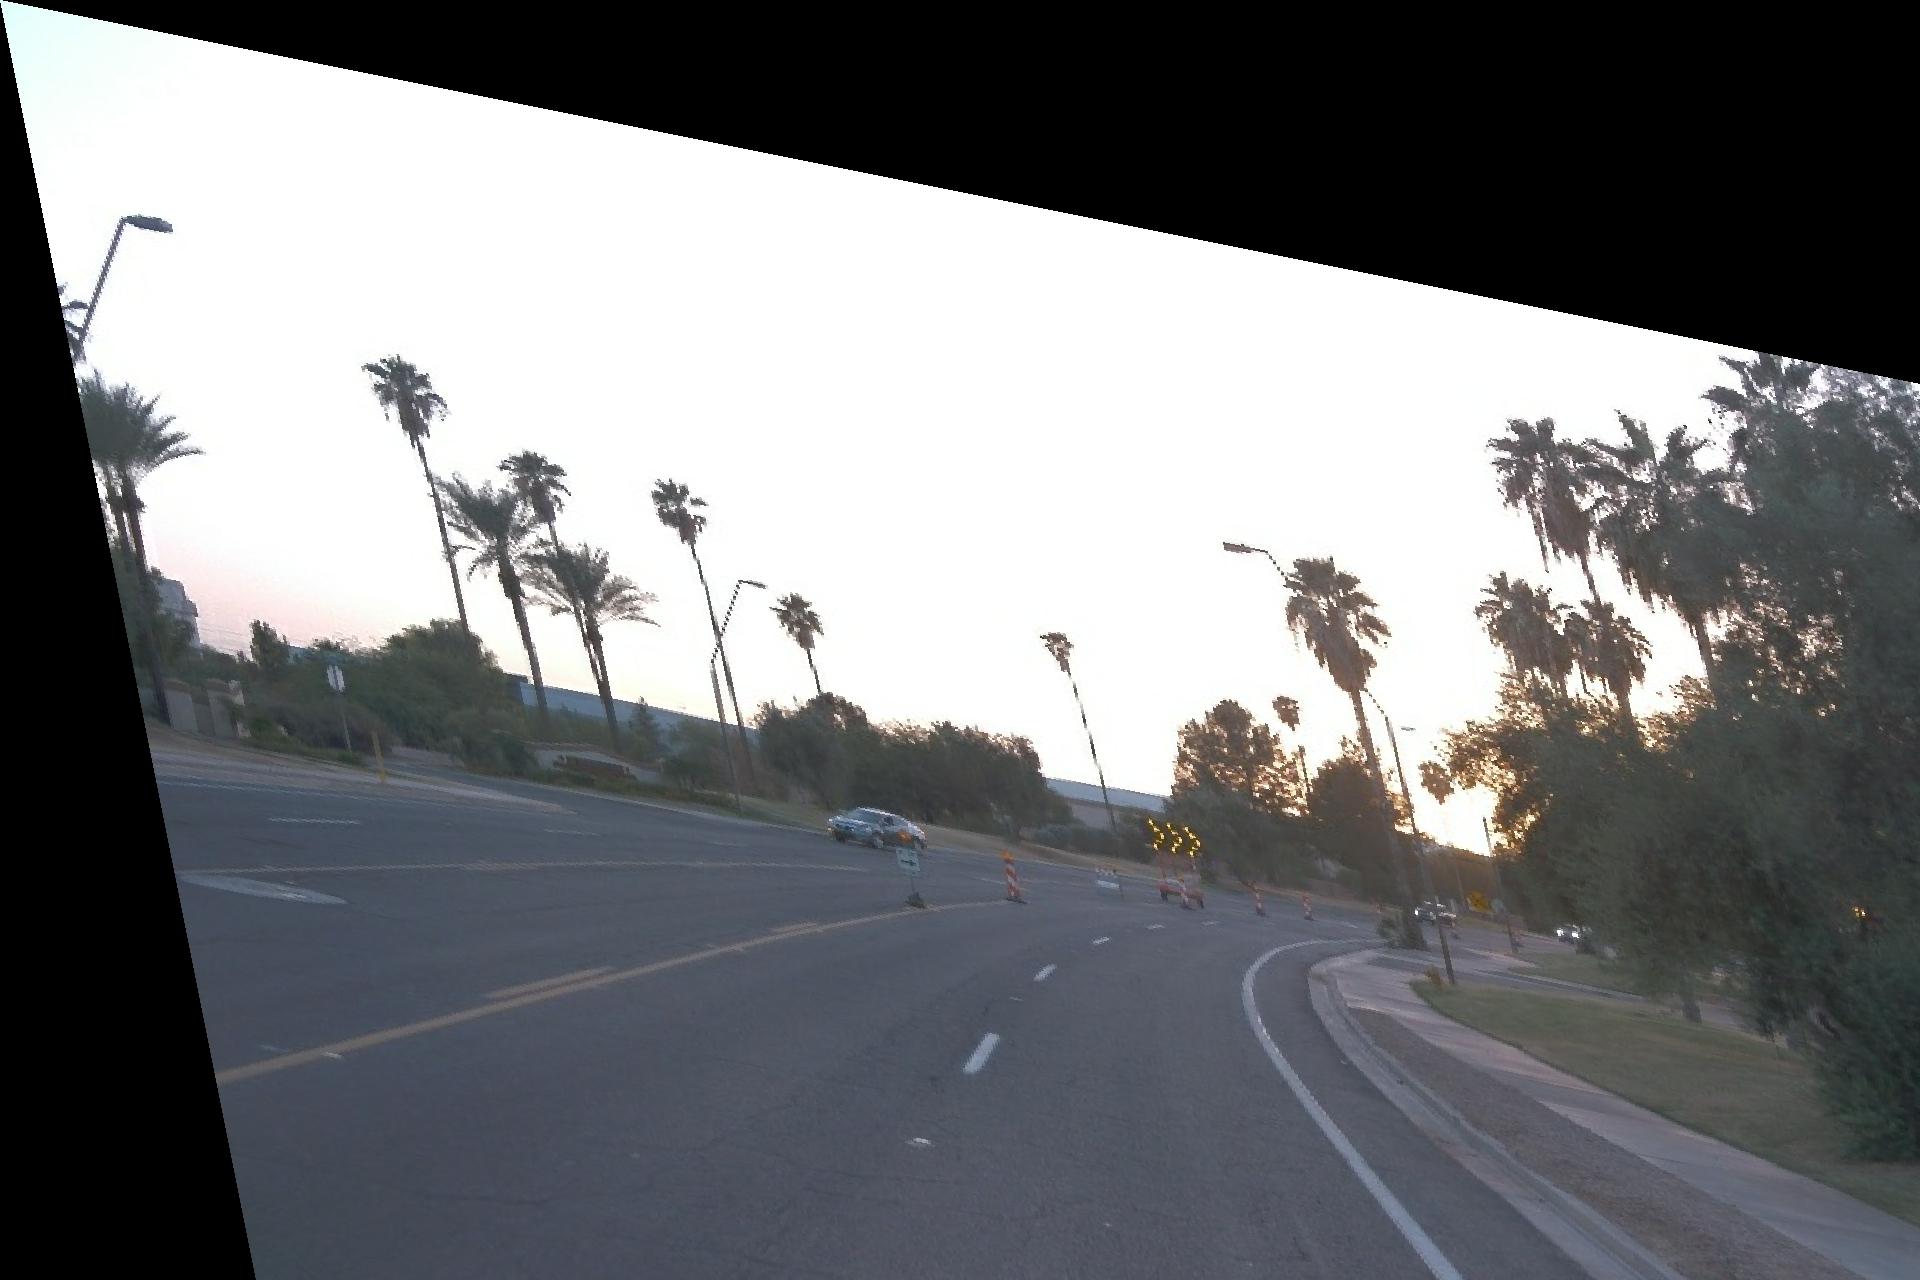

In [32]:
img.transform(img.size, method=Image.AFFINE, data=trans_inv.flatten())

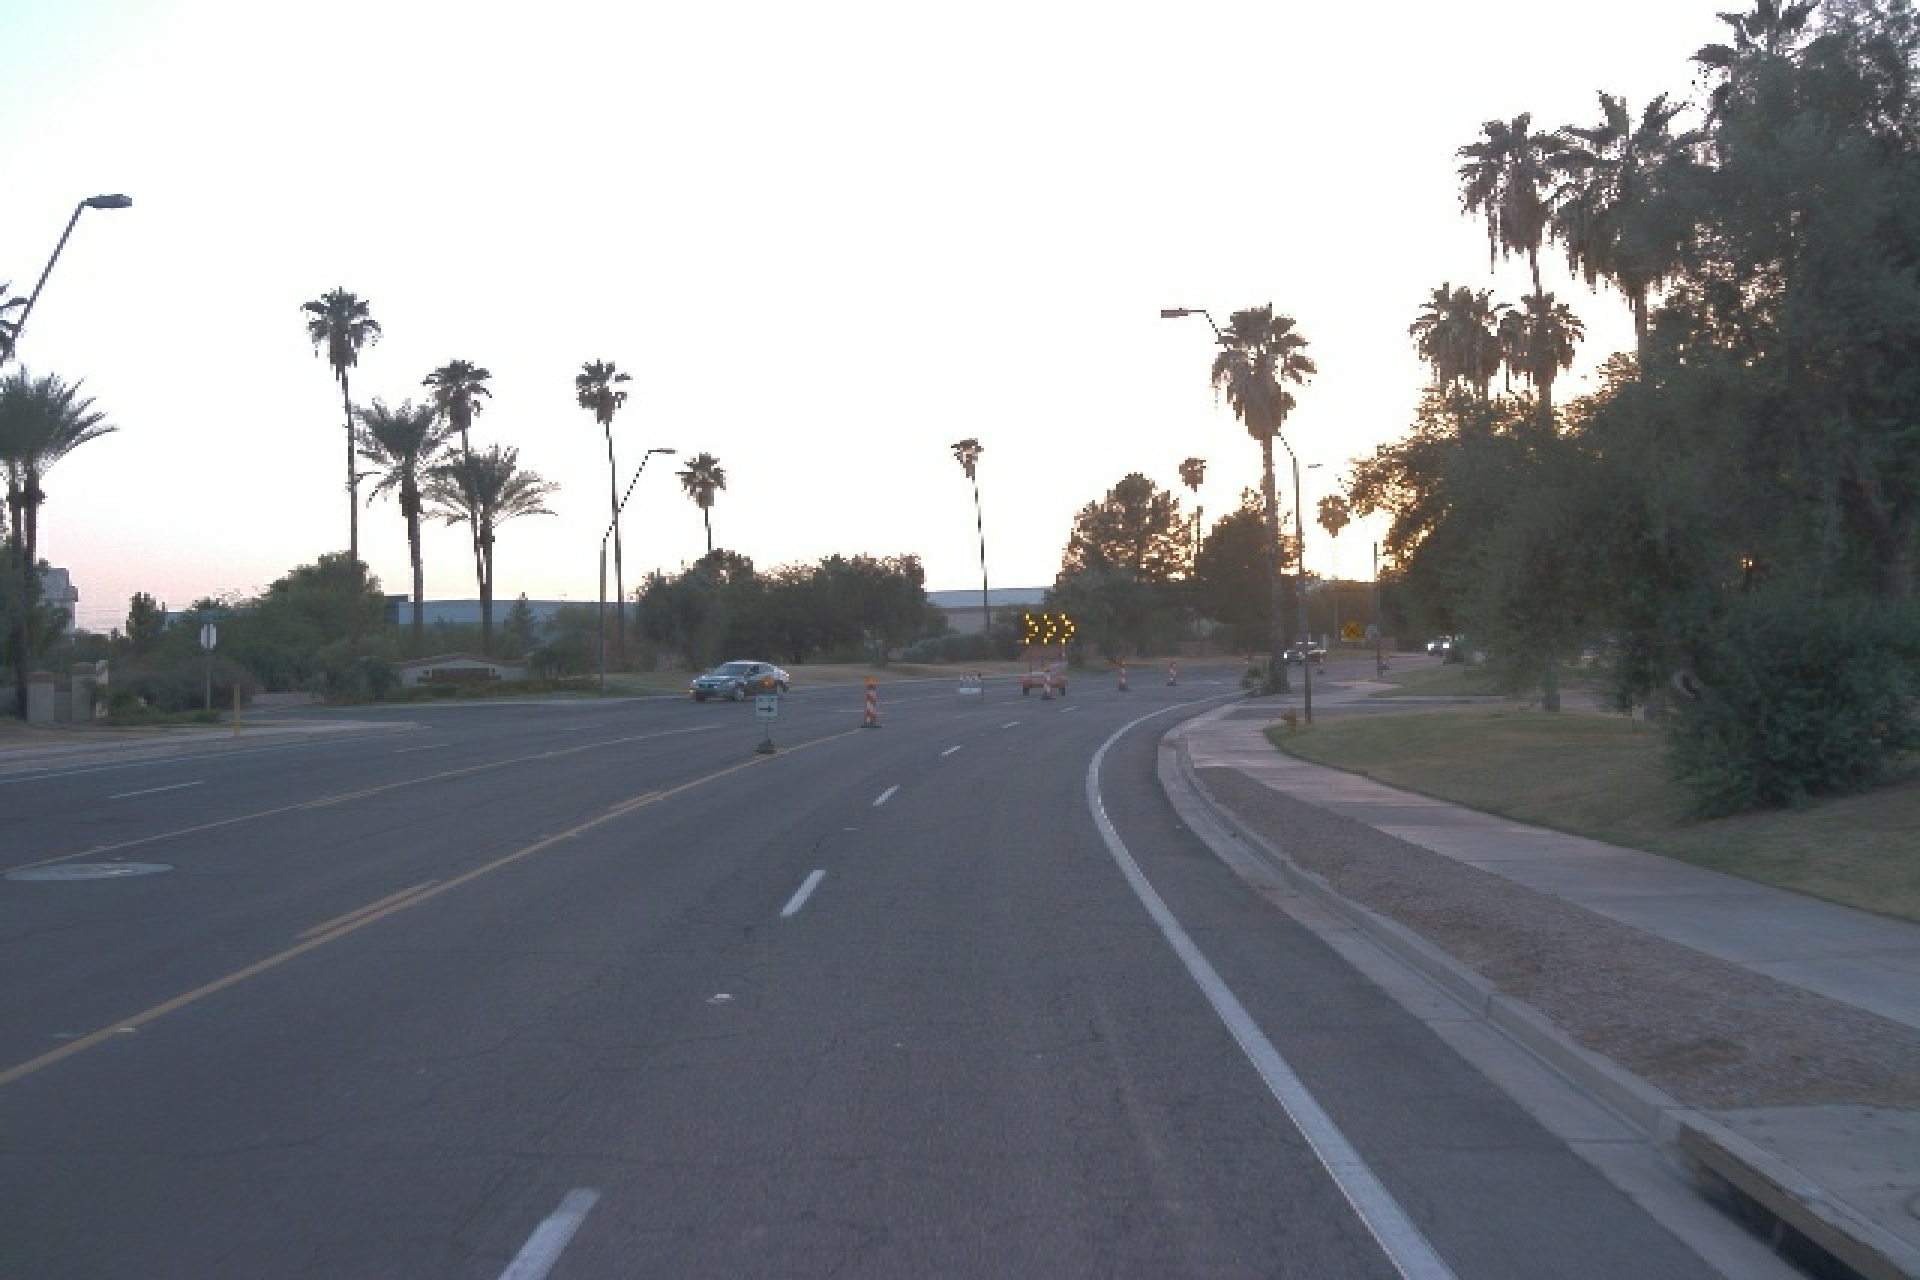

In [22]:
img

### Combination

In [40]:
translation = np.array([[1, 0, 200], [0, 1, 100], [0, 0, 1]])
shearing = np.array([[1, 0.1, 0], [0, 1, 0], [0, 0, 1]])
trans_matrix = translation @ shearing
trans_inv = np.linalg.inv(trans_matrix)

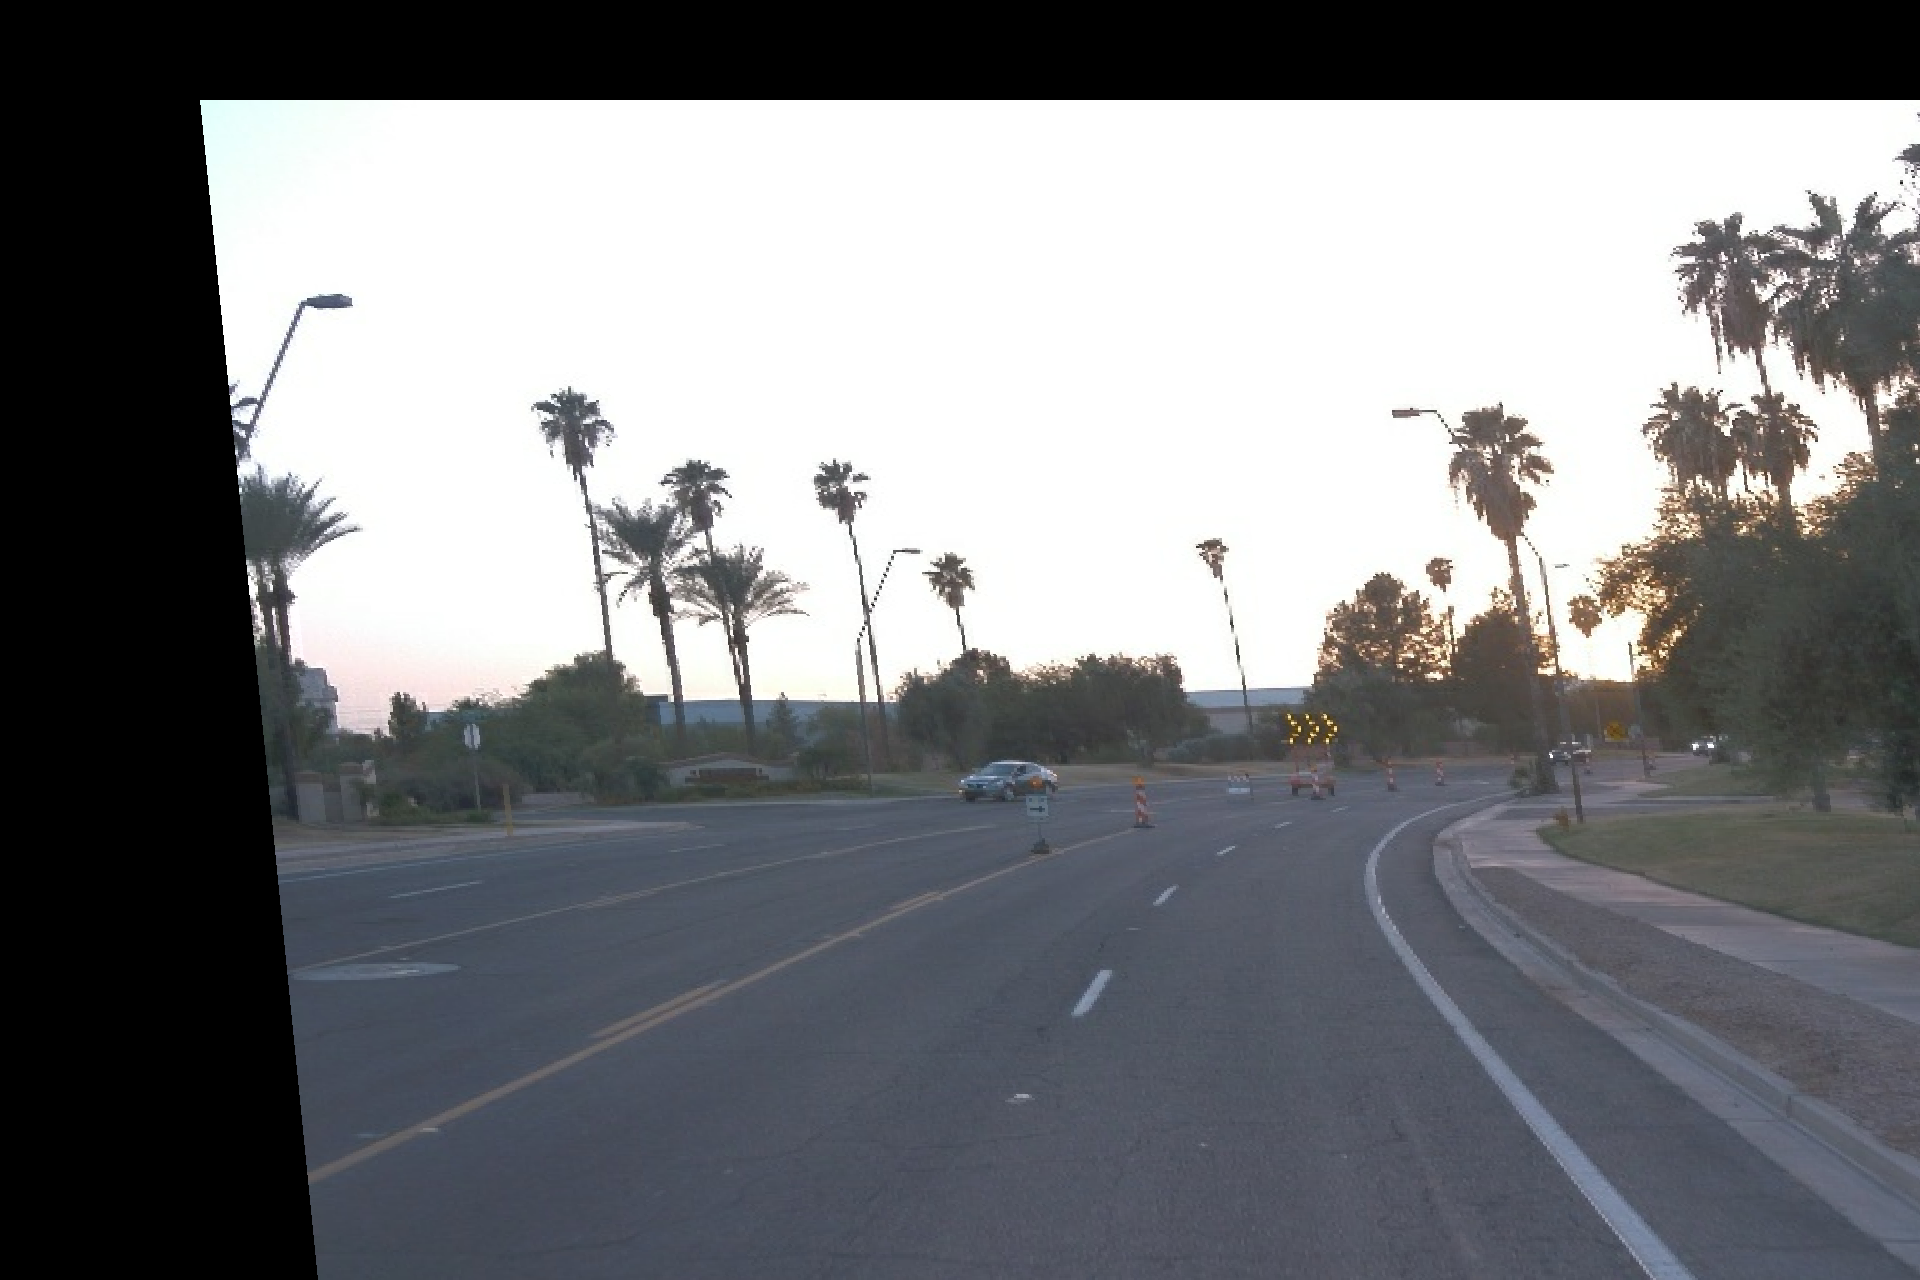

In [41]:
img.transform(img.size, method=Image.AFFINE, data=trans_inv.flatten())

In [38]:
translation

array([[  1,   0, 200],
       [  0,   1, 100],
       [  0,   0,   1]])

In [39]:
shearing

array([[1. , 0.1, 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ]])

In [35]:
translation * shearing

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [34]:
translation @ shearing

array([[1.e+00, 1.e-01, 2.e+02],
       [0.e+00, 1.e+00, 1.e+02],
       [0.e+00, 0.e+00, 1.e+00]])

In [36]:
np.matmul(translation, shearing)

array([[1.e+00, 1.e-01, 2.e+02],
       [0.e+00, 1.e+00, 1.e+02],
       [0.e+00, 0.e+00, 1.e+00]])

### Rotation (code does not work)

Rotation is also an affine transformation

$$
\left(\begin{array}{ccc} 
cos(theta) & sin(theta) & 0\\
-sin(theta) & cos(theta) & 0\\
0 & 0 & 1\\
\end{array}\right)
$$ 


In [50]:
trans_matrix = np.array([[0, 1, 0], [-1, 0, 0], [0, 0, 1]])
trans_inv = np.linalg.inv(trans_matrix)
trans_inv

array([[-0., -1., -0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

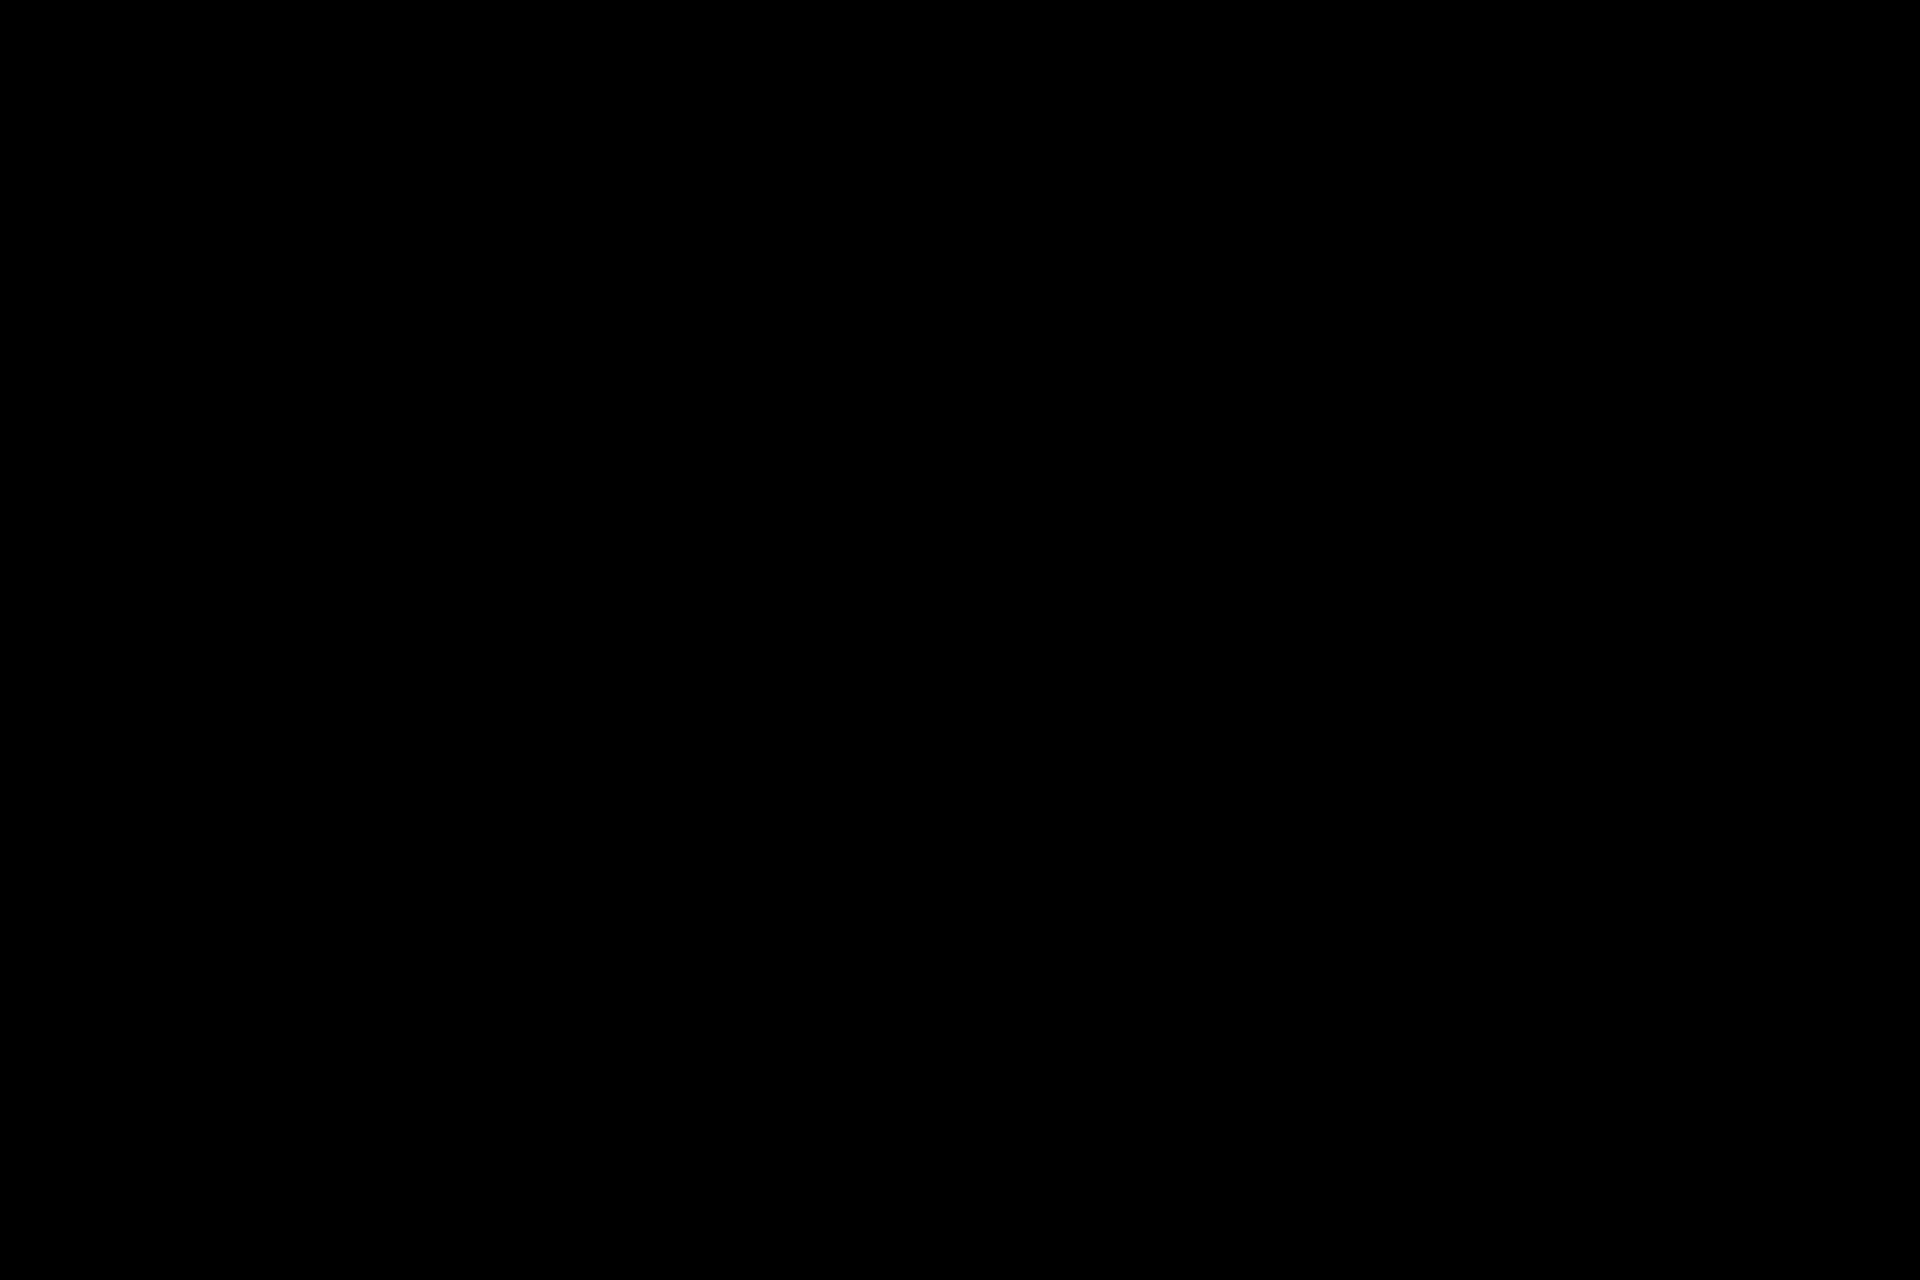

In [51]:
# img.transform(img.size, method=Image.AFFINE, data=trans_inv.flatten())
img.transform(img.size, method=Image.AFFINE, data=trans_inv.flatten())